# Predicting Renewable Electricity Outputs of different countries

### DSCI310 March 2nd, 2024 
Collaborators: Caden Chan, Neha Menon, Peter Chen & Tak Sripratak

## Summary

As a complex issue, climate change doesn't have a singular cause, though the impacts of burning fossil fuels are significant sources of greenhouse gases and have caused detrimental effects. Our analysis here explores if a subset of renewable energy-related World Development Indicators and a simple linear regression model can be used to predict renewable electricity outputs of countries worldwide. Our analysis created a model with a Root Mean Squared Error (RMSE) score of 23.74. Our model could predict most cases accurately, though some predictions with low accuracy were far from the actual values. Our model predicted some countries would have a negative renewable electricity output, demonstrating the need for a more complex analysis using advanced machine learning methods. By creating an advanced machine learning model, the capabilities of countries to produce more renewable electricity based on their other World Development Indicators can be calculated and used to influence country-specific and global goals and targets.

## Introduction 

Over the past few decades, climate change has been thoroughly studied. Climate change most commonly refers to the influx of greenhouse gases (GHG) in our atmosphere, leading to warming temperatures and having a vast range of effects on humans, ecosystems and global health. (National Geographic, 2023) Renewable energy sources such as solar, wind, hydroelectric, and geothermal power are crucial for reducing global greenhouse gas emissions and combating climate change. (NRDC, 2022) However, the adoption of renewable energy technology and the output of renewable energy varies significantly across countries due to various factors such as geographical location, technological capabilities, economic conditions, and policy frameworks. (Munk School Staff, 2022) In this analysis, we observe if a linear regression model can be used to predict the renewable electricity output of different countries based on other World Development Indicators. As the effects of climate change become more apparent, attention will shift to renewable energy sources and how they can be used to power daily activities necessary to achieve a clean energy world. (Loztof, K., 2022) By conducting this analysis, we identify the factors that may indicate renewable electricity output. These results could be used to influence global policy and set country-specific goals on renewable electricity production that are tailored to country circumstances based on values for World Development Indicators. By understanding these factors better, federal and global policy may focus more on improving these factors, allowing shifts to renewable electricity to be achieved more easily.

The dataset used in this project was sourced from the World Bank's World Development Indicators (WDI) database. (World Bank Group, 2023) The WDI is the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data and includes national, regional and global estimates. For the purpose of this project, the dataset was filtered to include indicators relevant to renewable energy.

## Methods and Results

**Step 1.** Data reading. In the first step, we read the data directly from the link to the zip file containing it and specify which file to use.

**Step 2.** Model selection. We will conduct a regression analysis to predict a numeric variable. A simple linear regression model will be used to adhere to project guidelines and keep the analysis at the level of DSCI 100.

**Step 3.** Specifying constraints for data sample selection. 2015 was chosen as the most recent year for which data on renewable energy production was available for all countries.

**Step 4.** Variable selection. After conducting a preliminary literature review and understanding some factors that may be related to renewable electricity production, the 8 variables below were chosen. Then, we explored the relationships between the 8 chosen variables and the target variable to see if there were pre-existing relationships that may be useful in our model.

**Step 5.** Exploratory visualization. We visualized all the predictor variables vs the target variable. Once these variables were visualized, it was determined that all the chosen variables would be used in the regression analysis.

**Step 6.** Dataset split. We split the data into a training and testing set. This ensures the golden rule is not violated, where our model is tested on the data that was used to create it, and our scoring metrics are reliable and indicative of the model's performance. Then, the model can be fitted using the training data and tested for performance on the testing data.

**Step 7.** Result report. After fitting the model on the training set and testing on the test set, we found the RMSE score to be 22.15. These results were visualized with the scatter plot showing the relationship between the predicted and actual values of the scatter plot.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import altair as alt
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import set_config
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
from sklearn.metrics import mean_squared_error

/var/folders/3s/j50x7qy95tqfgh9yc_4fbssw0000gn/T/ipykernel_42550/1066818966.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Reading the data in 
URL = urllib2.urlopen("https://databank.worldbank.org/data/download/WDI_CSV.zip").read()
file = ZipFile(BytesIO(URL))
data_csv = file.open("WDIData.csv")
data = pd.read_csv(data_csv)
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN


Table 1: The data structure

In [3]:
#This is tidying the data and making it usable for analysis 

#2015 was chosen as it was the most recent year in which there were the most values for the target variable

data1=pd.pivot_table(data, index= 'Country Name', values='2015', columns='Indicator Name')

data1.columns

data1= data1[['Access to electricity (% of population)', 'Adjusted net national income (constant 2015 US$)', 
             'CO2 emissions (kt)', 'Death rate, crude (per 1,000 people)',
              'Land area (sq. km)', 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
                'Population, total','Renewable energy consumption (% of total final energy consumption)',
             'Renewable electricity output (% of total electricity output)']]

In [4]:
#to keep this at the level of a DSCI100 project, NaN values were replaced with 0 instead of using a Standard Scaler, or another imputer method. 
energy_train, energy_test= train_test_split(data1, train_size=0.75)
data1=data1.fillna(0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, Afghanistan to Zimbabwe
Data columns (total 9 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Access to electricity (% of population)                                 265 non-null    float64
 1   Adjusted net national income (constant 2015 US$)                        265 non-null    float64
 2   CO2 emissions (kt)                                                      265 non-null    float64
 3   Death rate, crude (per 1,000 people)                                    265 non-null    float64
 4   Land area (sq. km)                                                      265 non-null    float64
 5   PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)  265 non-null    float64
 6   Population, total                                                       2

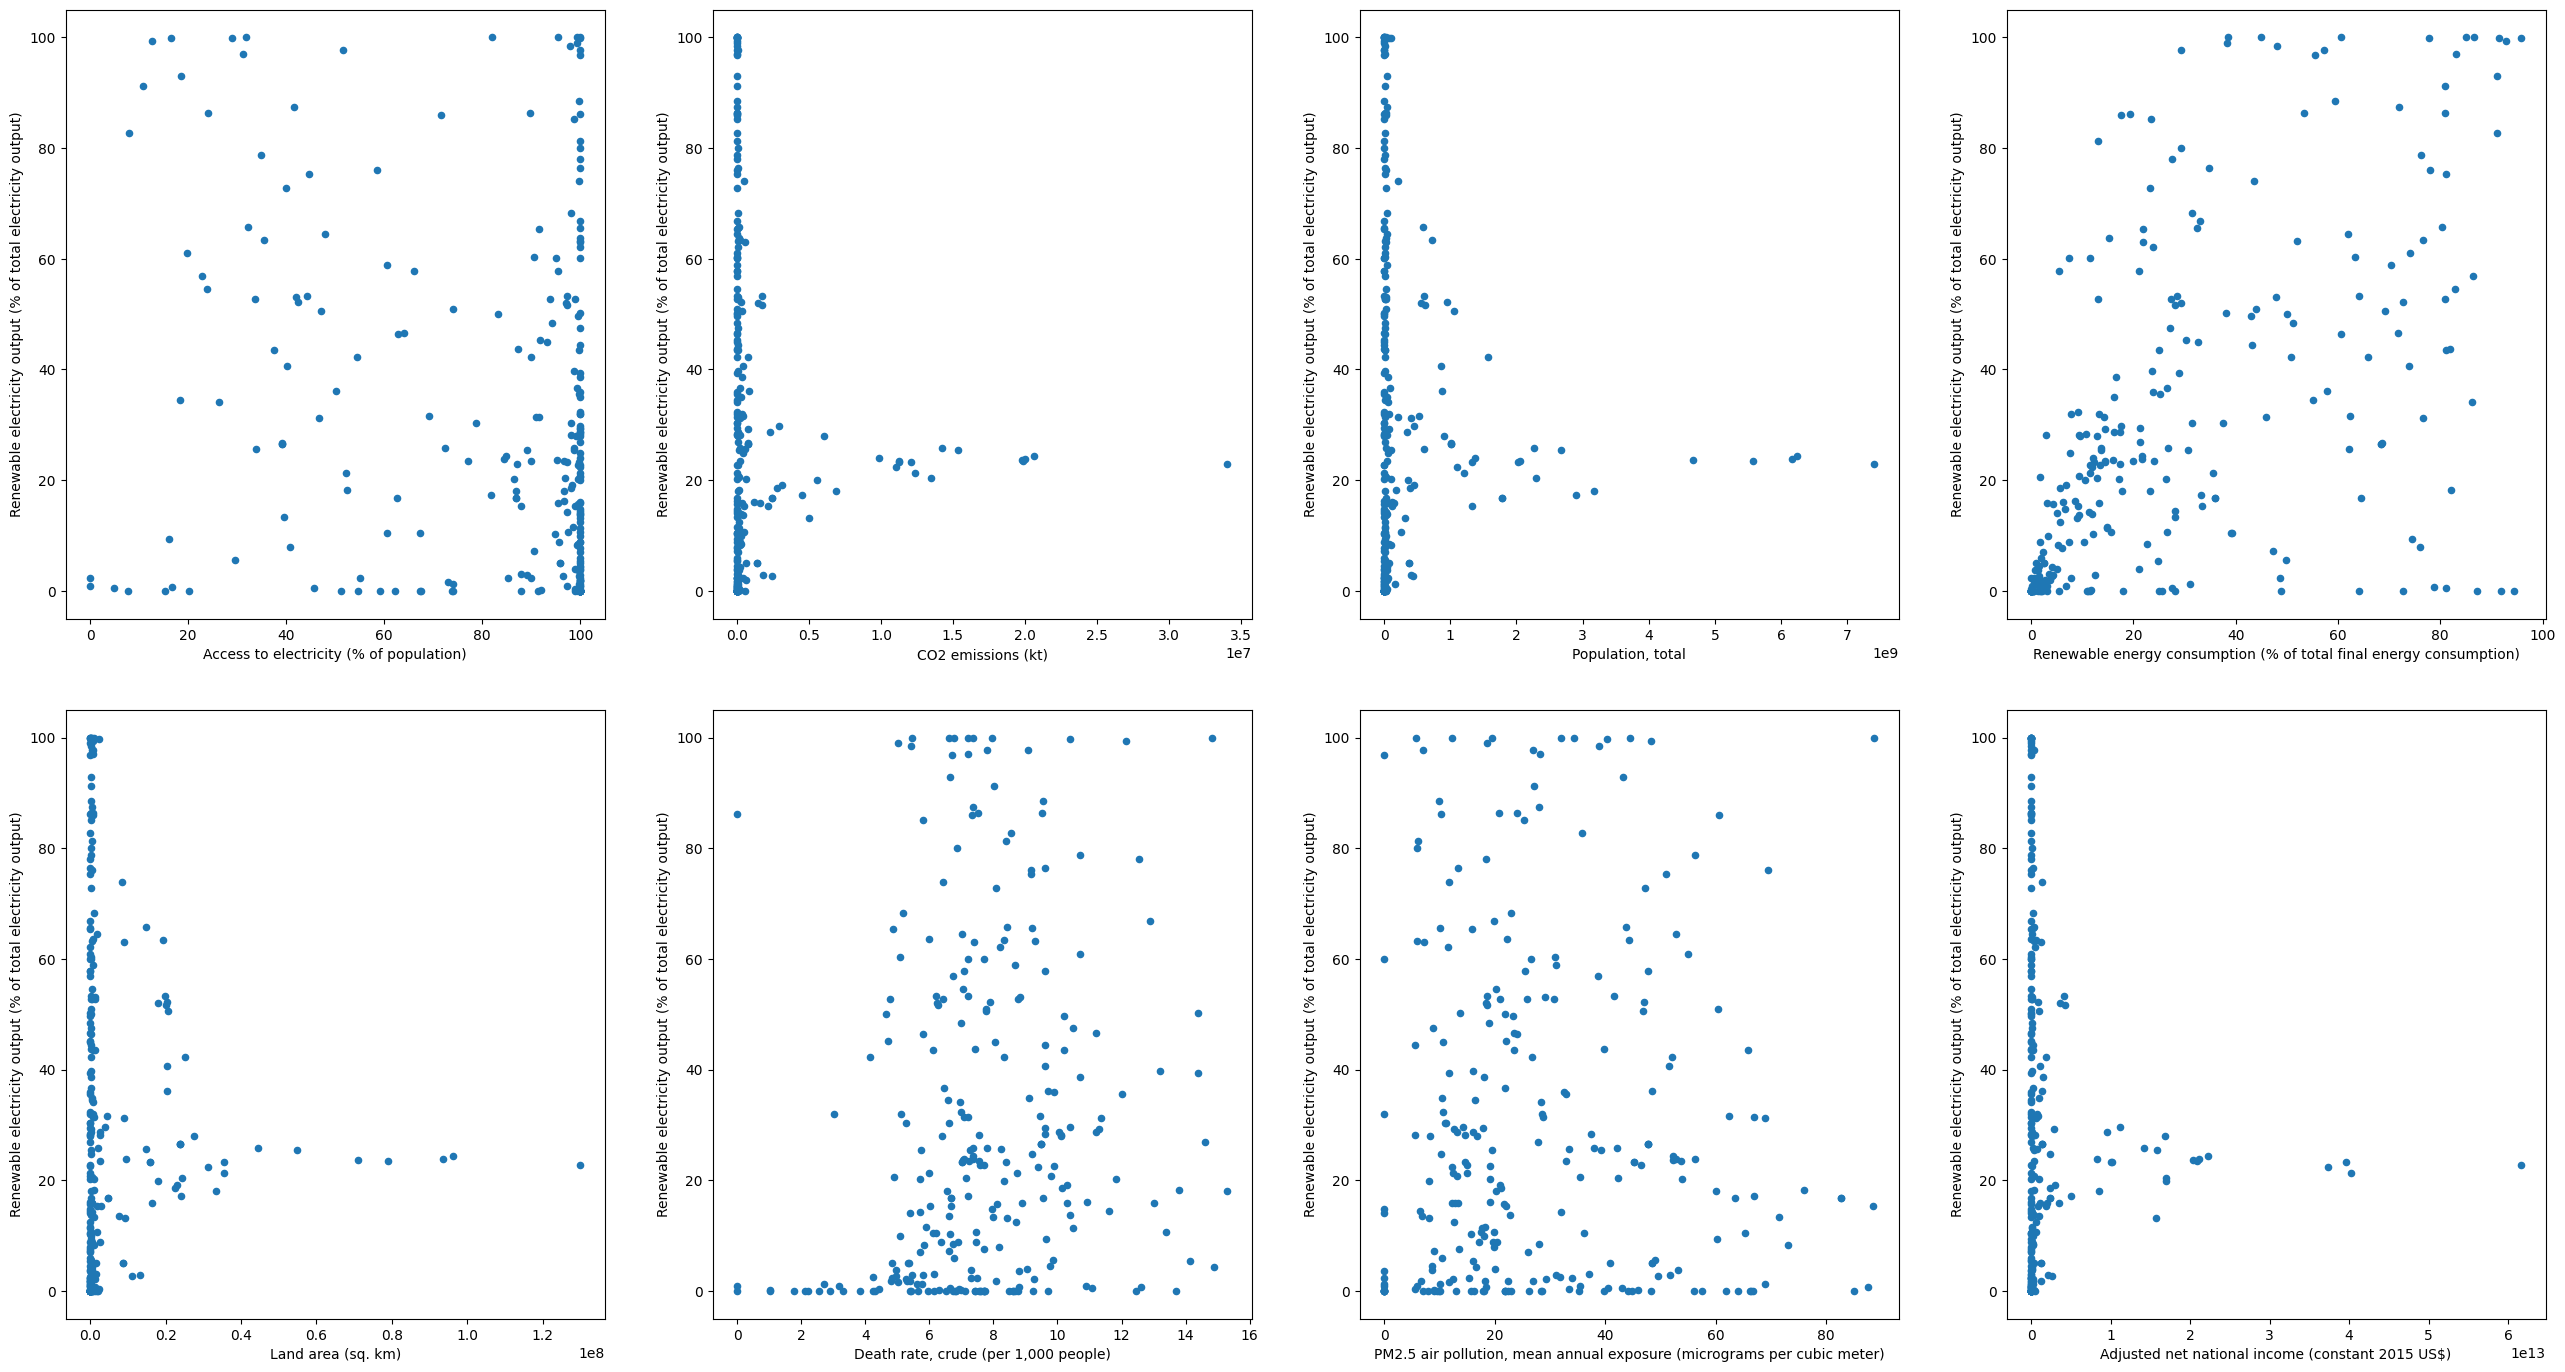

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(32, 17))

toprow= ['Access to electricity (% of population)', 'CO2 emissions (kt)', 'Population, total', 'Renewable energy consumption (% of total final energy consumption)']
bottomrow= ['Land area (sq. km)', 'Death rate, crude (per 1,000 people)', 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', 'Adjusted net national income (constant 2015 US$)']

c=-1
for i in range(len(toprow)): 
    data1.plot.scatter(x=toprow[i], y='Renewable electricity output (% of total electricity output)', ax=axes[0,c+1])
    c=c+1

c=-1
for i in range(len(bottomrow)): 
    data1.plot.scatter(x=bottomrow[i], y='Renewable electricity output (% of total electricity output)', ax=axes[1,c+1])
    c=c+1

plt.subplots_adjust(wspace=0.2, hspace=0.15)


Figure 1a-1h: (From left to right on each row). After reading some of the literature, these variables were chosen, and exploratory data analysis was conducted to visualize their relationship with the target variable. Plots d), f), and g) show a weak, positive linear relationship, while plots b), c), e) and h) show no relationship, though they can still be used as predictor variables.

In [6]:
#split data into training and testing

energy_train, energy_test= train_test_split(data1, train_size=0.75)

#splitting the x and y columns of the data
energy_train_x= energy_train.drop('Renewable electricity output (% of total electricity output)', axis=1)
energy_train_y= energy_train[["Renewable electricity output (% of total electricity output)"]]

energy_test_x= energy_test.drop('Renewable electricity output (% of total electricity output)', axis=1)
energy_test_y= energy_test[["Renewable electricity output (% of total electricity output)"]]

In [7]:
#making the linear model
lm=LinearRegression()

lm.fit(energy_train_x, energy_train_y)

energy_test_y['predicted']= lm.predict(energy_test_x)


/var/folders/3s/j50x7qy95tqfgh9yc_4fbssw0000gn/T/ipykernel_42550/3188114063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_test_y['predicted']= lm.predict(energy_test_x)


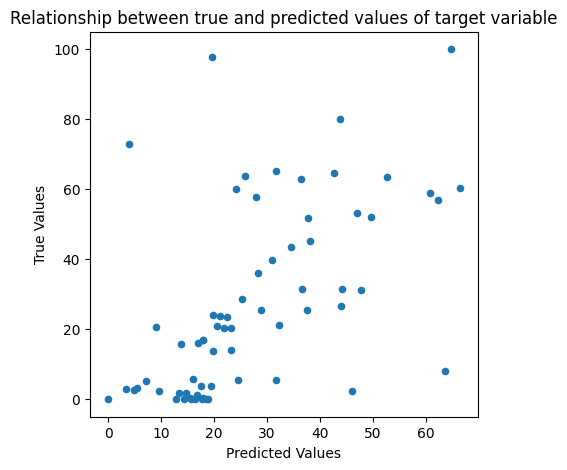

In [8]:
plot1=energy_test_y.plot.scatter(x="predicted", y='Renewable electricity output (% of total electricity output)', 
                                 figsize=(5,5), title="Relationship between true and predicted values of target variable",
                                xlabel="Predicted Values", ylabel="True Values")



Figure 2: A graph showing the relationship between the actual values of renewable electricity output and the models generated predictions of the target variable. A weak positive relationship is observed, showing the model is able to predict some cases.

In [9]:
energy_RMSE = mean_squared_error(y_true=energy_test_y['Renewable electricity output (% of total electricity output)'],y_pred=energy_test_y["predicted"])**(1/2)

energy_RMSE

21.527200640182897

# Discussion


To visualize the results of our analysis, the predicted values were plotted against the actual values. If our model were perfect, when observing the plot, we would observe all dots on a line with a 45-degree angle with a slope of 1, meaning that the predicted values would be equal to the actual values. However, the scatter of the points shows slight variation from this ideal, which is expected in real-world data. From a visual assessment, there appears to be a moderate clustering of points along the 45-degree angle, a relatively strong linear relation. The spread of points indicates variability in the accuracy of the predictions across different values of renewable electricity output.

The root mean squared error (RMSE) was calculated to be 23.74. This metric measures the difference between each predicted and actual value, squares it, finds the mean and takes the square root. The interpretation of this value is 23.74% since our target variable was measured as the proportion of renewable energy produced (out of 100%). This indicates a modest fit, implying that while the model has some predictive ability, the model does not capture a significant portion of the outcome variability. In addition, it must be noted that the model predicts some values as negative, which shows that the model's limitation as a negative renewable electricity production is not possible. There is room for improvement by incorporating additional variables, employing more complex modelling techniques, or improving data quality. The findings, particularly the model score, suggest a moderate level of predictive power. This has been expected given the complexity of factors influencing renewable electricity outputs in different countries, including economic, geographical, technological, and policy factors, which might not be fully captured by the selected indicators alone.

These findings could be significant for policymakers, energy planners, and researchers interested in understanding the determinants of renewable energy production across different nations. Understanding the factors that influence renewable electricity output can help design more effective policies, make informed investment decisions, and guide future research in renewable energy. It highlights the need for comprehensive strategies that consider a wide range of factors to increase renewable electricity output effectively.

The results from this analysis can lead to the following questions:

- Improving Model Accuracy: How can the model's predictive accuracy be improved? Incorporating more comprehensive data, such as policy indices, technological advancement metrics, and more geographical information, might improve predictions.

- Temporal Analysis: How do trends in renewable electricity output change over time, and what factors drive these trends? An ANOVA longitudinal study could provide insights into the effectiveness of policies and technological progress.

- Impact of Non-traditional Factors: How do non-traditional factors, such as public opinion, international cooperation, and educational levels, impact renewable energy output? Exploring these could provide us with a more holistic understanding of the dynamics at play.

# References

Lotzof, K. (2022, December 20). Renewable energy and its importance for tackling climate change. National History Museum. https://www.nhm.ac.uk/discover/renewable-energy.html

Munk School Staff. (2022, October 7). Why some countries lead – and others lag – in the race to clean energy: Study. University of Toronto. https://www.utoronto.ca/news/why-some-countries-lead-and-others-lag-race-clean-energy-study

National Geographic Society. (2023, October 19). Climate Change. https://education.nationalgeographic.org/resource/climate-change

United Nations. (2023, May 18). Renewable energy – powering a safer future. https://www.un.org/en/climatechange/raising-ambition/renewable-energy

Shinn, L. (2022, June 1). Renewable Energy Definition—Sources, Clean Alternatives. NRDC. https://www.nrdc.org/stories/renewable-energy-clean-facts

World Bank. (2023, December 18). World Development Indicators. The World Bank | Data Catalog. https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators